In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from utils import *
from rsigw1 import *
from sigw1 import *
from generators import *
from evaluation import *
from data import *
from config import *
import config
import generators


def get_generator(name):
    if name == "NeuralSDE":
        return NeuralSDEGenerator(N_LAGS, INPUT_DIM_NSDE, DATA_DIM, RESERVOIR_DIM_GEN, BROWNIAN_DIM, get_activation(ACTIVATION_ID))
    elif name == "LSTM":
        return LSTMGenerator(INPUT_DIM_LSTM, DATA_DIM, HIDDEN_DIM_LSTM, NUM_LAYERS_LSTM)

def get_training(name, data_train, data_val):
    if name == "RSigW1":
        return RSigWGANTraining(data_train, data_val, BATCH_SIZE, get_generator(GENERATOR_ID), GRADIENT_STEPS,
                                LEARNING_RATE, RESERVOIR_DIM_METRIC, DATA_DIM, get_activation(ACTIVATION_ID))
    elif name == "SigW1":
        return SigWGANTraining(data_train, data_val, BATCH_SIZE, get_generator(GENERATOR_ID), GRADIENT_STEPS,
                               LEARNING_RATE, TRUNCATION_DEPTH, NORMALISE_SIG)


In [3]:
torch.autograd.set_detect_anomaly(True)
data = get_data(DATA_ID)[0]
data_train, data_val, data_test = get_data(DATA_ID)[1]


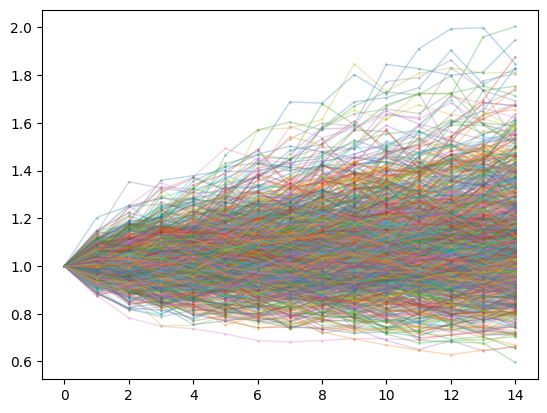

In [4]:
import matplotlib.pyplot as plt 
import numpy as np 

def visualize_data(data, dim = 0):
    data = data.numpy()
    plt.plot(data[:1000][...,dim].T, alpha=0.3, marker='o',linewidth=1, markersize=1)
visualize_data(data_train.exp())


In [5]:
training = get_training(DISCRIMINATOR_ID, data_train, data_val)
training.fit()

 10%|█         | 100/1000 [04:38<41:37,  2.77s/it]

rsig-w1 - train loss: 5.49e-01, best train loss: 3.51e-01, val loss: 5.75e-01


 20%|██        | 200/1000 [09:15<39:11,  2.94s/it]

rsig-w1 - train loss: 6.78e-01, best train loss: 2.13e-01, val loss: 6.88e-01


 30%|███       | 300/1000 [14:00<33:44,  2.89s/it]

rsig-w1 - train loss: 3.98e-01, best train loss: 1.63e-01, val loss: 4.17e-01


 40%|████      | 400/1000 [18:41<28:28,  2.85s/it]

rsig-w1 - train loss: 1.71e-01, best train loss: 1.63e-01, val loss: 1.78e-01


 50%|█████     | 500/1000 [23:19<24:09,  2.90s/it]

rsig-w1 - train loss: 4.95e-01, best train loss: 1.53e-01, val loss: 4.70e-01


 60%|██████    | 600/1000 [27:55<18:57,  2.84s/it]

rsig-w1 - train loss: 7.45e-01, best train loss: 1.27e-01, val loss: 7.37e-01


 70%|███████   | 700/1000 [32:30<14:11,  2.84s/it]

rsig-w1 - train loss: 6.01e-01, best train loss: 1.18e-01, val loss: 5.83e-01


 80%|████████  | 800/1000 [37:06<09:23,  2.82s/it]

rsig-w1 - train loss: 5.86e-01, best train loss: 1.13e-01, val loss: 5.73e-01


 90%|█████████ | 900/1000 [41:47<04:45,  2.86s/it]

rsig-w1 - train loss: 3.35e-01, best train loss: 9.85e-02, val loss: 3.61e-01


100%|██████████| 1000/1000 [46:39<00:00,  2.80s/it]

rsig-w1 - train loss: 2.21e-01, best train loss: 9.85e-02, val loss: 2.49e-01


In [6]:
evaluation = Evaluation(training, data_train, data_test, data.scaler, GENERATOR_ID, DISCRIMINATOR_ID, ACTIVATION_ID, DATA_ID)

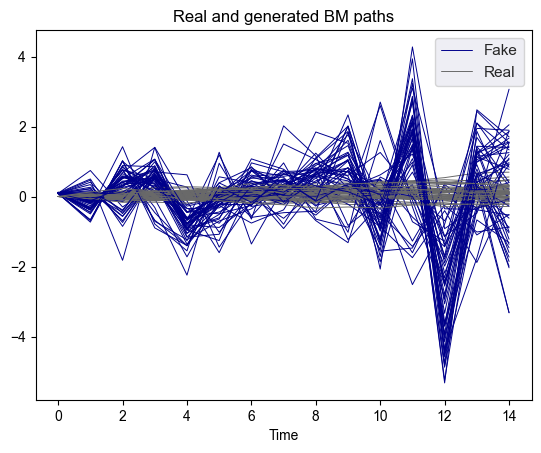

In [7]:
evaluation.print_summary()
evaluation.plot_paths(50)
evaluation.save_paths()
evaluation.save_best_generator()